In [1]:
devtools::install_github("blekhmanlab/biomehorizon")

Skipping install of 'biomehorizon' from a github remote, the SHA1 (5d30adab) has not changed since last install.
  Use `force = TRUE` to force installation



# 加载包及示例数据

In [2]:
library(biomehorizon) 

# 样本数据预览

In [3]:
## OTU 表格式。第一列包含微生物分类单元 ID（或 16S 数据的 OTU），
## 所有其他列都是样本。值代表给定样本中每个微生物的样本读数。
## 虽然在这种情况下值是整数样本读数，但它们也可以表示为总样本的比例或百分比。
## 列不需要定义名称。

library(dplyr)

otusample_diet %>%
    arrange(desc(MCT.f.0002)) %>%
    select(1:7) %>%
    head()



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




taxon_id MCT.f.0002 MCT.f.0003 MCT.f.0004 MCT.f.0005 MCT.f.0006 MCT.f.0007
1 taxon 1  220949     25921      112186     48113      52260      78360     
2 taxon 2   63019      4537       31306     16093      14077      24294     
3 taxon 4   51407       436       20574     10770      11810      22105     
4 taxon 6   50088      5124       25748     12910      11716      12623     
5 taxon 30  42797      2867       21296     12927       9489      16386     
6 taxon 3   37879      2868       16377      7226       7554      12240

In [4]:
## 元数据格式。必须以日期或数字格式包含与 otusample、主题 ID 和集合日期的列名称匹配的 Sample ID。
## 包含示例 ID、收集日期和主题名称的列必须分别命名为“示例”、“collection_date”和“主题”。

head(metadatasample_diet)

subject sample     collection_date supplement
1 MCTs01  MCT.f.0002 2               EVOO      
2 MCTs01  MCT.f.0003 3               EVOO      
3 MCTs01  MCT.f.0004 4               EVOO      
4 MCTs01  MCT.f.0005 5               EVOO      
5 MCTs01  MCT.f.0006 6               EVOO      
6 MCTs01  MCT.f.0007 7               EVOO

In [5]:
## 分类数据格式（Taxonomydata format）。描述从界到属的每个微生物（或OTU，16S数据）的分类学。
## 没有分类的级别具有 NA 值。您可以提供一个字符串向量，每个字符串包含微生物的整个分类法，级别由分号分隔，
## 或者为每个分类级别提供一个包含列的表，其中第一列是 OTU ID。
## 列不需要定义的名称。支持分类至亚种（8级）

head(taxonomysample_diet)

taxon_id
1 taxon 1 
2 taxon 2 
3 taxon 3 
4 taxon 4 
5 taxon 5 
6 taxon 6 
  taxonomy                                                                                                                    
1 Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Bacteroidaceae;Bacteroides                                                 
2 Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Bacteroidaceae;Bacteroides;Bacteroides uniformis                           
3 Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales                                                                            
4 Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Rikenellaceae;Alistipes;Alistipes putredinis;Alistipes putredinis DSM 17216
5 Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;Prevotella copri;Prevotella copri DSM 18205      
6 Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Bacteroidaceae;Bacteroides;Bacteroides dorei

# 数据优化及OTU选择
在使用 main 函数可视化数据之前，我们必须首先准备数据集和其他变量，以便使用prepanel()函数进行分析。这是要做的事。
1. 筛选1000
2. 仅将样本筛选到一个受试者
3. 将值转换为百分比（如果它们尚未采用该格式）
4. 检查数据集的格式
5. 检查并捕获常见的用户错误
然后，它将在可以提供给 main 函数的列表中输出优化的参数。
您可以仅将此函数与 OTU 表一起使用，但这假定所有样本都来自同一主题。
由于otusample_diet有 34 个受试者，因此我们需要提供与其受试者匹配样本的其他元数据。
我们的元数据还包含每个样本的收集时间点，这将使我们能够确保样本按时间顺序排序。

让我们选择项目“MCTs01”。MCTs01 提供多少个样品？

In [36]:
length(metadatasample_diet$subject[metadatasample_diet$subject == "MCTs01"])

paramList <- prepanel(
    otudata = otusample_diet,
    metadata = metadatasample_diet, 
    subj = "MCTs01"
)


[1] 15

Constructed an OTU table and other variables with the following settings:
thresh_prevalence: 80
thresh_abundance: 0.5
thresh_NA: 5
subj: MCTs01

35 OTUs met the filtering requirements, with the following stats:
     OTU_ID Average_abundance Prevalence Num_missing_samples
1   taxon 1        23.4808510        100                   0
2   taxon 2         7.0220155        100                   0
3   taxon 3         3.6456202        100                   0
4   taxon 4         5.6399479        100                   0
5   taxon 6         3.4120092        100                   0
6   taxon 8         1.7292719        100                   0
7   taxon 9         2.9895162        100                   0
8  taxon 10         1.9505486        100                   0
9  taxon 11         1.3130744        100                   0
10 taxon 12         0.8252183        100                   0
11 taxon 13         2.8683227        100                   0
12 taxon 14         4.4062186        100                 

In [7]:
library(dplyr)
## 从 MCT01 中检索样本
otusample_subj1 <- otusample_diet %>%
    select(
        taxon_id,
        as.character((metadatasample_diet %>%
            filter(subject == "MCTs01"))$sample)
    )

## taxon2 的读取样本
otusample_subj1 %>%
    filter(taxon_id == "taxon 2") %>%
    select(-taxon_id) %>%
    as.numeric()


[1] 63019  4537 31306 16093 14077 24294 31317 35236 18594 52592 16422 39671
[13] 13605 32534  3230

这35个OTU是使用默认过滤阈值选择的，但也许我们想要更严格的标准。

In [8]:
paramList <- prepanel(
    otudata = otusample_diet,
    metadata = metadatasample_diet,
    subj = "MCTs01",
    thresh_prevalence = 90,
    thresh_abundance = 1.5
)


Constructed an OTU table and other variables with the following settings:
thresh_prevalence: 90
thresh_abundance: 1.5
thresh_NA: 5
subj: MCTs01

14 OTUs met the filtering requirements, with the following stats:
     OTU_ID Average_abundance Prevalence Num_missing_samples
1   taxon 1         23.480851        100                   0
2   taxon 2          7.022015        100                   0
3   taxon 3          3.645620        100                   0
4   taxon 4          5.639948        100                   0
5   taxon 6          3.412009        100                   0
6   taxon 8          1.729272        100                   0
7   taxon 9          2.989516        100                   0
8  taxon 10          1.950549        100                   0
9  taxon 13          2.868323        100                   0
10 taxon 14          4.406219        100                   0
11 taxon 23          1.698653        100                   0
12 taxon 30          4.789708        100                 

另外，我们可以手动选择OTU。

In [9]:
paramList <- prepanel(
    otudata = otusample_diet,
    metadata = metadatasample_diet,
    subj = "MCTs01",
    otulist = c("taxon 1", "taxon 2", "taxon 10", "taxon 14")
)


Constructed an OTU table and other variables with the following settings:
thresh_prevalence: 80
thresh_abundance: 0.5
thresh_NA: 5
subj: MCTs01


# 构建地平线图
在用prepanel提炼数据后，我们向horizonplot提供参数列表以构建地平线图。

Constructed an OTU table and other variables with the following settings:
thresh_prevalence: 80
thresh_abundance: 0.5
thresh_NA: 5
subj: MCTs01

35 OTUs met the filtering requirements, with the following stats:
     OTU_ID Average_abundance Prevalence Num_missing_samples
1   taxon 1        23.4808510        100                   0
2   taxon 2         7.0220155        100                   0
3   taxon 3         3.6456202        100                   0
4   taxon 4         5.6399479        100                   0
5   taxon 6         3.4120092        100                   0
6   taxon 8         1.7292719        100                   0
7   taxon 9         2.9895162        100                   0
8  taxon 10         1.9505486        100                   0
9  taxon 11         1.3130744        100                   0
10 taxon 12         0.8252183        100                   0
11 taxon 13         2.8683227        100                   0
12 taxon 14         4.4062186        100                 

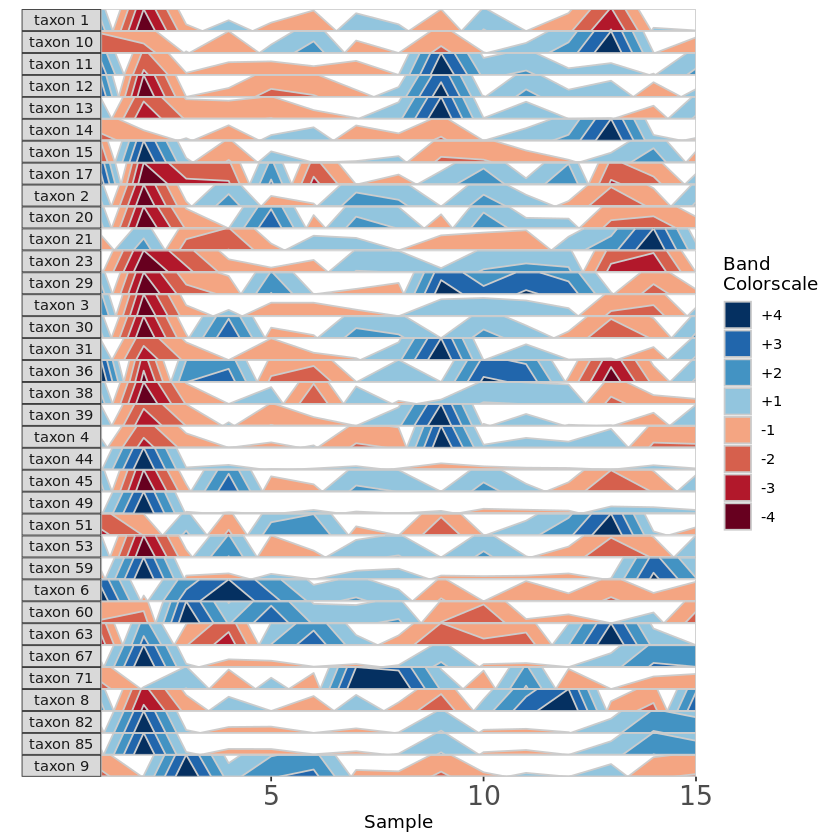

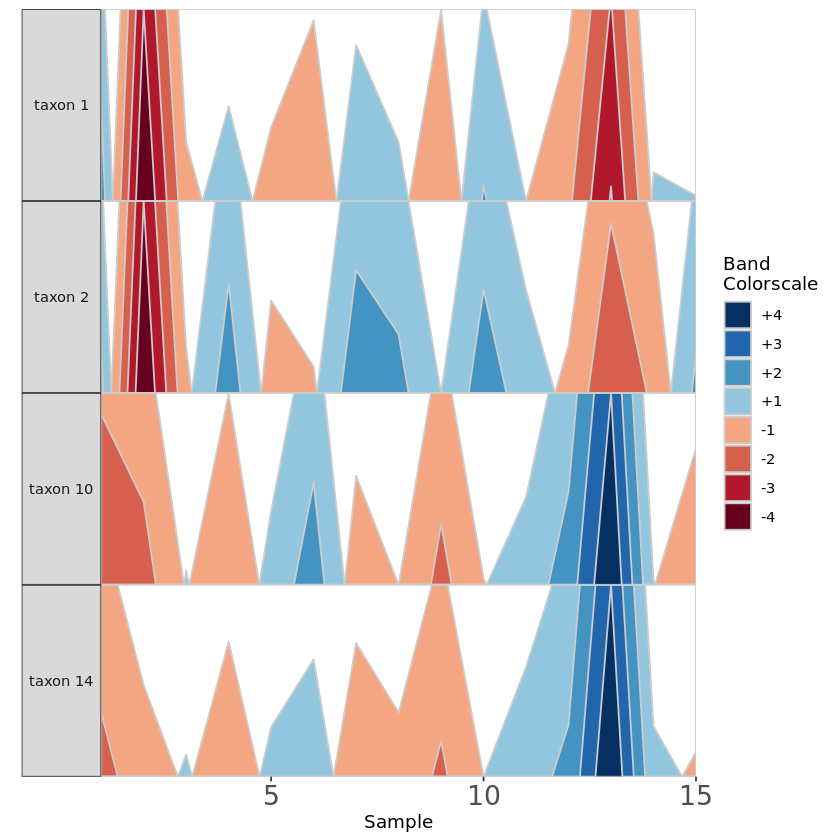

In [10]:
## 使用默认过滤阈值的基本图
paramList <- prepanel(
    otudata = otusample_diet,
    metadata = metadatasample_diet,
    subj = "MCTs01"
)

horizonplot(paramList)

## 手动选择微生物
paramList <- prepanel(
    otudata = otusample_diet,
    metadata = metadatasample_diet,
    subj = "MCTs01",
    otulist = c("taxon 1", "taxon 2", "taxon 10", "taxon 14")
)

horizonplot(paramList)


注意，在手动选择的图中，微生物是按照它们在otulist中的顺序排列的。如果你想以特定的顺序排列微生物面板，你应该使用这个载体。

# 在多个实验对象中绘制单一微生物图谱
与其在一个受试者身上绘制多种微生物，我们还可以在多个受试者身上绘制一种微生物来比较同一时间点。然而，要使用这种设置，受试者必须在相同的日子里有相同数量的样本被采集。我们将把饮食数据集细分为6个受试者，他们在研究的所有17天都被采样。


Constructed an OTU table and other variables with the following settings:
thresh_prevalence: 80
thresh_abundance: 0.5
thresh_NA: 5
subj: c("MCTs08", "MCTs18", "MCTs23", "MCTs26", "MCTs36", "MCTs33")
singleVarOTU: taxon 1
Constructed a horizon plot with the following settings:
nbands: 4
facetLabelsByTaxonomy: FALSE
formatStep: FALSE
fill_NA: zoo::na.approx(y)
OTU table `biomehorizonpkg_refined_otu` was outputted to the environment.


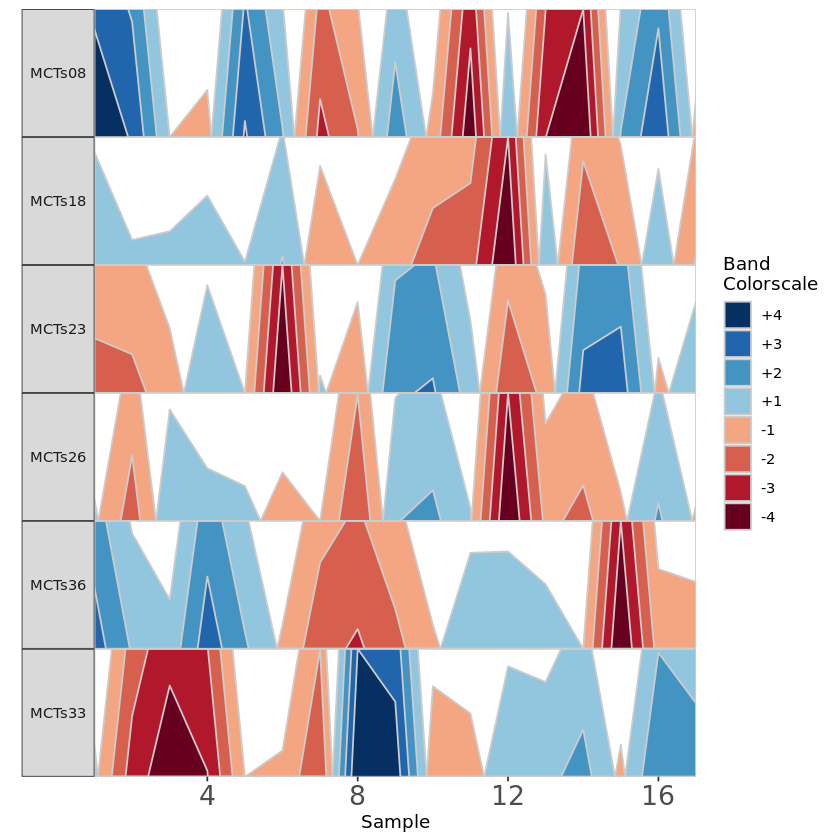

In [11]:
## 对所有17天都被抽样的受试者的数据集进行子集，并按日期排列。
metadata_17 <- metadatasample_diet %>%
  filter(subject %in%
    c("MCTs08", "MCTs18", "MCTs23", "MCTs26", "MCTs33", "MCTs36")) %>%
  arrange(subject, collection_date)

otu_17 <- otusample_diet %>%
  select(taxon_id, as.character((metadatasample_diet %>%
    filter(subject %in%
      c("MCTs08", "MCTs18", "MCTs23", "MCTs26", "MCTs33", "MCTs36")))$sample))

## 用 "Taxon1 "进行单变量分析
paramList <- prepanel(
  otudata = otu_17,
  metadata = metadata_17,
  singleVarOTU = "taxon 1",
  subj = c("MCTs08", "MCTs18", "MCTs23", "MCTs26", "MCTs36", "MCTs33")
)

horizonplot(paramList)


根据这个图，我们可以推断出，在采样时间点12，受试者MCTs18、MCTs23和MCTs26都有分类群1的丰度下降。请注意，受试者的面是根据其在提供给subj的向量中的顺序排列的。

# 调整条带以突出常见或罕见的OTU

为了强调数据的不同属性，可以调整地平线图上的带子。有三个指标可以定义地平线图上的数值范围：**原点**、**带状厚度**和**nbands**。

## 默认值

一个OTU的第一个正带的基点，即Y轴值=0的地方，是原点。每个条带的Y刻度高度是条带厚度。默认情况下，每个OTU的原点被计算为该OTU在所有样品中的中位值，带宽代表相对于该OTU的绝对极值而言，原点以上4个四分位数（蓝色带）和以下4个四分位数（红色带）。

换句话说，如果OTU A的相对丰度值从0%到30%，中位数为10%，那么每个条带代表丰度范围为(30-10)/4 = 5%。因此，OTU A在时间点1的带状色度值为+2，表明OTU A在时间点1的相对丰度在（最小=10+5，最大=10+2*5）=15-20%之间，而OTU A在时间点2的带状色度值为-2，表明OTU A在时间点2的相对丰度为0-5%。由于OTU A的最大值与原点之间的距离（30-10%=20%）大于最小值与原点之间的距离（10-0%=10%），因此没有带色标为-3或-4的时间点。

通过在每个OTU内进行缩放，多个OTU的动态可以在同一张图上可视化，这些OTU的中位丰度可能相差几个数量级。

然而，我们可以对地平线图添加一些修改，以强调我们纵向数据的不同方面。

## 自定义值

首先，我们改变了数据被分割成的正带的数量。

Constructed an OTU table and other variables with the following settings:
thresh_prevalence: 80
thresh_abundance: 0.5
thresh_NA: 5
subj: MCTs01

35 OTUs met the filtering requirements, with the following stats:
     OTU_ID Average_abundance Prevalence Num_missing_samples
1   taxon 1        23.4808510        100                   0
2   taxon 2         7.0220155        100                   0
3   taxon 3         3.6456202        100                   0
4   taxon 4         5.6399479        100                   0
5   taxon 6         3.4120092        100                   0
6   taxon 8         1.7292719        100                   0
7   taxon 9         2.9895162        100                   0
8  taxon 10         1.9505486        100                   0
9  taxon 11         1.3130744        100                   0
10 taxon 12         0.8252183        100                   0
11 taxon 13         2.8683227        100                   0
12 taxon 14         4.4062186        100                 

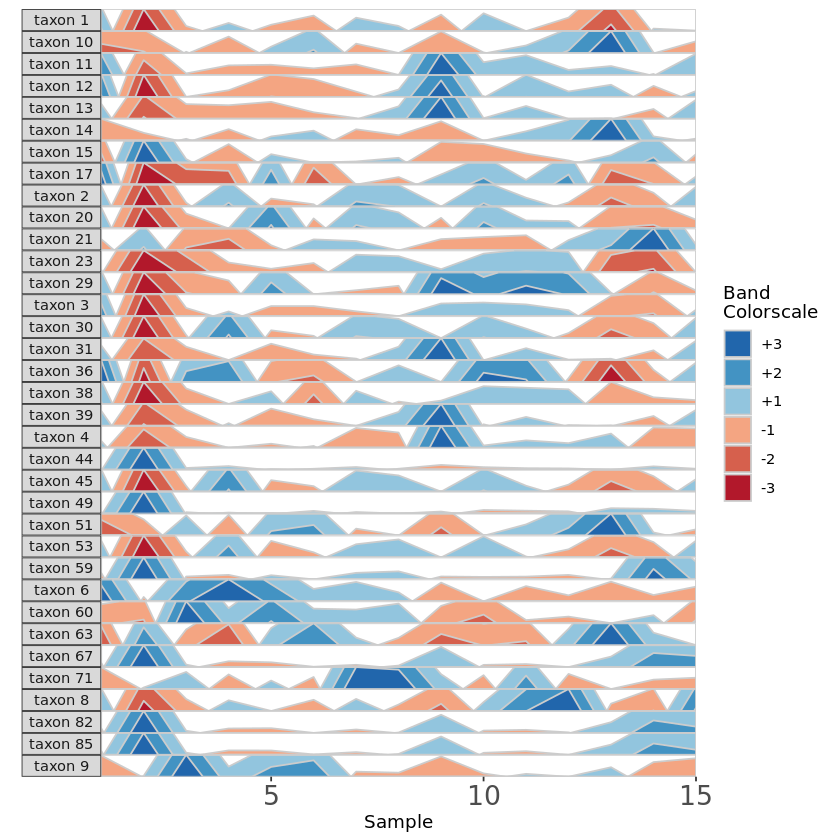

In [12]:
paramList <- prepanel(
    otudata = otusample_diet,
    metadata = metadatasample_diet,
    subj = "MCTs01",
    nbands = 3
)

horizonplot(paramList)


包括更多的水平带将更精确地区分数值，并强调那些处于最高幅度的数值。使用较少的波段会使数据中极端的数值变得不那么突出。

我们还可以改变原点，即所有样本值的中心值。我们可以将其作为一个常数，为所有的OTU设置一个固定的原点值，或者作为一个对样本值进行操作的函数，为每个面板评估一个独特的原点。

Constructed an OTU table and other variables with the following settings:
thresh_prevalence: 80
thresh_abundance: 0.5
thresh_NA: 5
subj: MCTs01

35 OTUs met the filtering requirements, with the following stats:
     OTU_ID Average_abundance Prevalence Num_missing_samples
1   taxon 1        23.4808510        100                   0
2   taxon 2         7.0220155        100                   0
3   taxon 3         3.6456202        100                   0
4   taxon 4         5.6399479        100                   0
5   taxon 6         3.4120092        100                   0
6   taxon 8         1.7292719        100                   0
7   taxon 9         2.9895162        100                   0
8  taxon 10         1.9505486        100                   0
9  taxon 11         1.3130744        100                   0
10 taxon 12         0.8252183        100                   0
11 taxon 13         2.8683227        100                   0
12 taxon 14         4.4062186        100                 

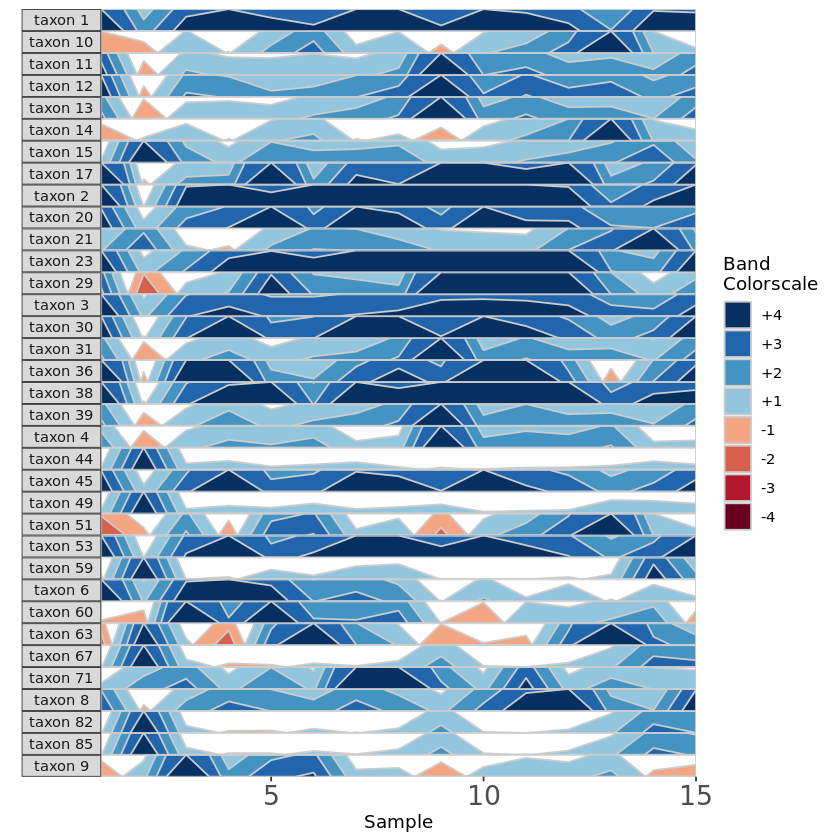

In [13]:
## 原点为样本值的平均绝对偏差
paramList <- prepanel(
    otudata = otusample_diet,
    metadata = metadatasample_diet,
    subj = "MCTs01",
    origin = function(y) {
        mad(y, na.rm = TRUE)
    }
)

horizonplot(paramList)


Constructed an OTU table and other variables with the following settings:
thresh_prevalence: 80
thresh_abundance: 0.5
thresh_NA: 5
subj: MCTs01

35 OTUs met the filtering requirements, with the following stats:
     OTU_ID Average_abundance Prevalence Num_missing_samples
1   taxon 1        23.4808510        100                   0
2   taxon 2         7.0220155        100                   0
3   taxon 3         3.6456202        100                   0
4   taxon 4         5.6399479        100                   0
5   taxon 6         3.4120092        100                   0
6   taxon 8         1.7292719        100                   0
7   taxon 9         2.9895162        100                   0
8  taxon 10         1.9505486        100                   0
9  taxon 11         1.3130744        100                   0
10 taxon 12         0.8252183        100                   0
11 taxon 13         2.8683227        100                   0
12 taxon 14         4.4062186        100                 

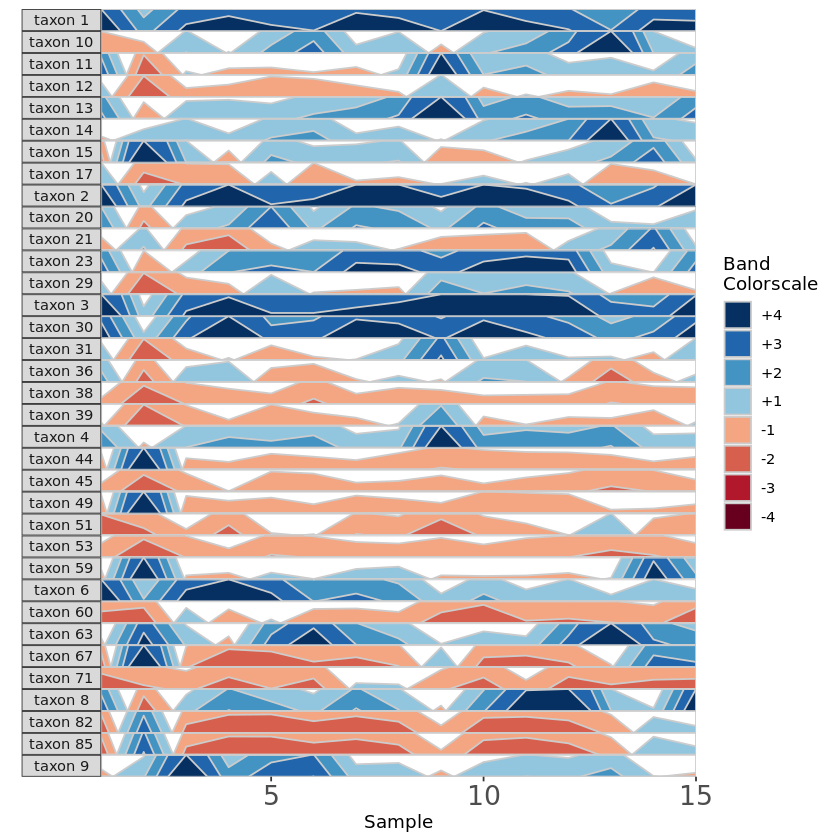

In [14]:
## 为所有OTU子面板设置1%的固定原点
paramList <- prepanel(
    otudata = otusample_diet,
    metadata = metadatasample_diet,
    subj = "MCTs01",
    origin = 1
)
horizonplot(paramList)


同样，我们可以修改条带的厚度，即每个水平带子的高度由一个独特的颜色表示，这决定了地平线子图的比例。

Constructed an OTU table and other variables with the following settings:
thresh_prevalence: 80
thresh_abundance: 0.5
thresh_NA: 5
subj: MCTs01

35 OTUs met the filtering requirements, with the following stats:
     OTU_ID Average_abundance Prevalence Num_missing_samples
1   taxon 1        23.4808510        100                   0
2   taxon 2         7.0220155        100                   0
3   taxon 3         3.6456202        100                   0
4   taxon 4         5.6399479        100                   0
5   taxon 6         3.4120092        100                   0
6   taxon 8         1.7292719        100                   0
7   taxon 9         2.9895162        100                   0
8  taxon 10         1.9505486        100                   0
9  taxon 11         1.3130744        100                   0
10 taxon 12         0.8252183        100                   0
11 taxon 13         2.8683227        100                   0
12 taxon 14         4.4062186        100                 

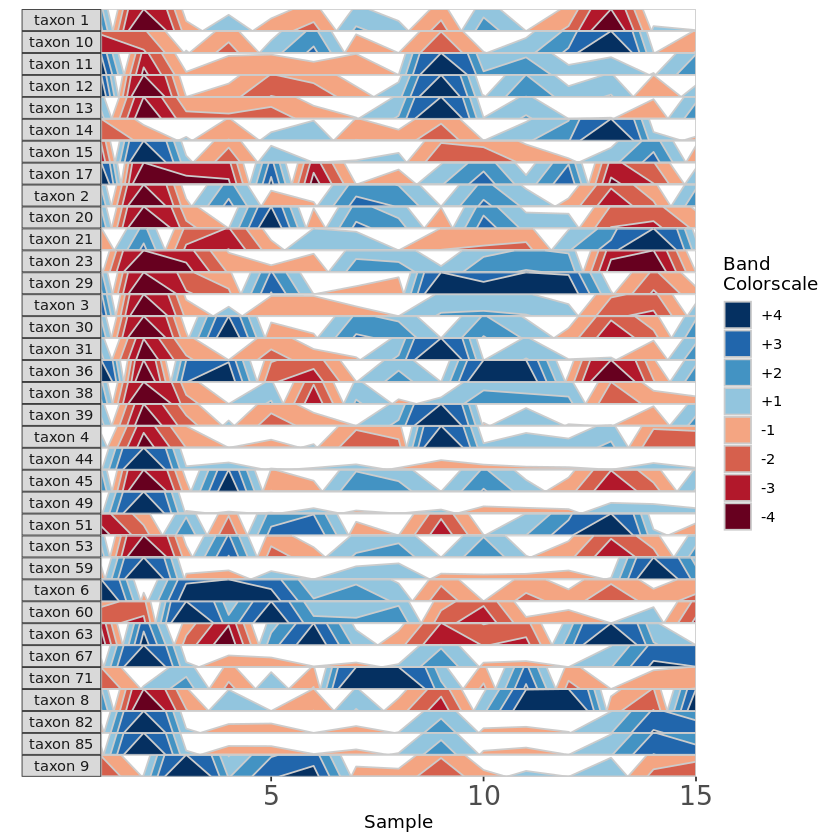

In [15]:
## 设置带状厚度为原点与最大值之间距离的1/6
paramList <- prepanel(
    otudata = otusample_diet,
    metadata = metadatasample_diet,
    subj = "MCTs01",
    band.thickness = function(y) {
        max((abs(y - origin(y))),
            na.rm = TRUE
        ) / 6
    }
)

horizonplot(paramList)


在这里，由于最高带的顶部只有最大值的4/6，这就成为新的最大值，所有更高的值都被向下舍入。对于负数段也是如此。这对于消除数据极值处的离群值很有价值。

Constructed an OTU table and other variables with the following settings:
thresh_prevalence: 80
thresh_abundance: 0.5
thresh_NA: 5
subj: MCTs01

35 OTUs met the filtering requirements, with the following stats:
     OTU_ID Average_abundance Prevalence Num_missing_samples
1   taxon 1        23.4808510        100                   0
2   taxon 2         7.0220155        100                   0
3   taxon 3         3.6456202        100                   0
4   taxon 4         5.6399479        100                   0
5   taxon 6         3.4120092        100                   0
6   taxon 8         1.7292719        100                   0
7   taxon 9         2.9895162        100                   0
8  taxon 10         1.9505486        100                   0
9  taxon 11         1.3130744        100                   0
10 taxon 12         0.8252183        100                   0
11 taxon 13         2.8683227        100                   0
12 taxon 14         4.4062186        100                 

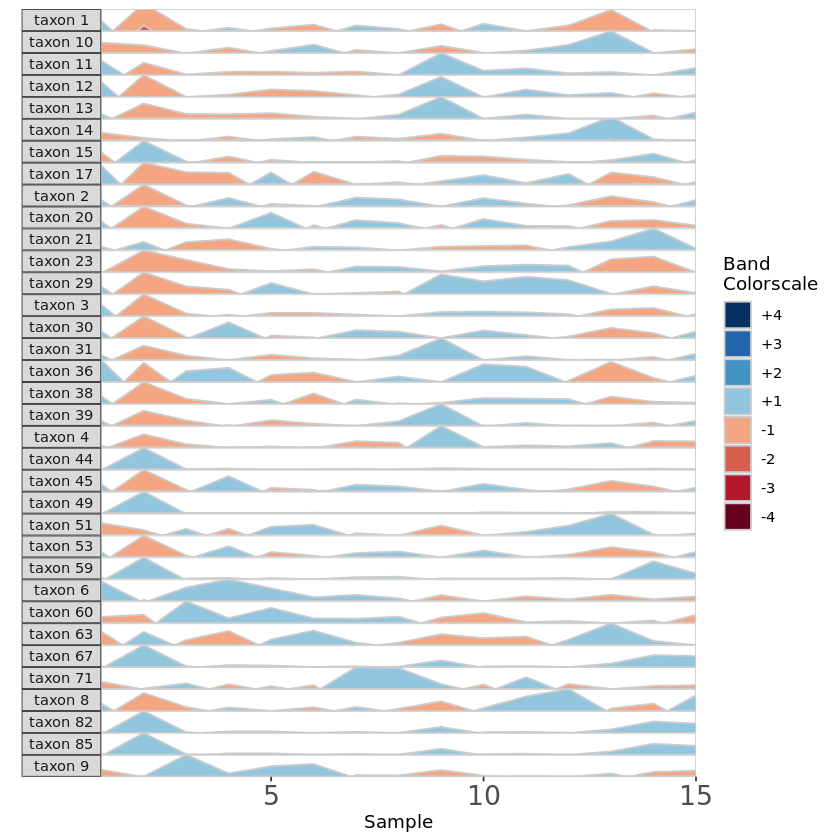

In [16]:
## 固定带厚度为10%
paramList <- prepanel(
    otudata = otusample_diet,
    metadata = metadatasample_diet,
    subj = "MCTs01",
    band.thickness = 10
)

horizonplot(paramList)


Constructed an OTU table and other variables with the following settings:
thresh_prevalence: 80
thresh_abundance: 0.5
thresh_NA: 5
subj: MCTs01

35 OTUs met the filtering requirements, with the following stats:
     OTU_ID Average_abundance Prevalence Num_missing_samples
1   taxon 1        23.4808510        100                   0
2   taxon 2         7.0220155        100                   0
3   taxon 3         3.6456202        100                   0
4   taxon 4         5.6399479        100                   0
5   taxon 6         3.4120092        100                   0
6   taxon 8         1.7292719        100                   0
7   taxon 9         2.9895162        100                   0
8  taxon 10         1.9505486        100                   0
9  taxon 11         1.3130744        100                   0
10 taxon 12         0.8252183        100                   0
11 taxon 13         2.8683227        100                   0
12 taxon 14         4.4062186        100                 

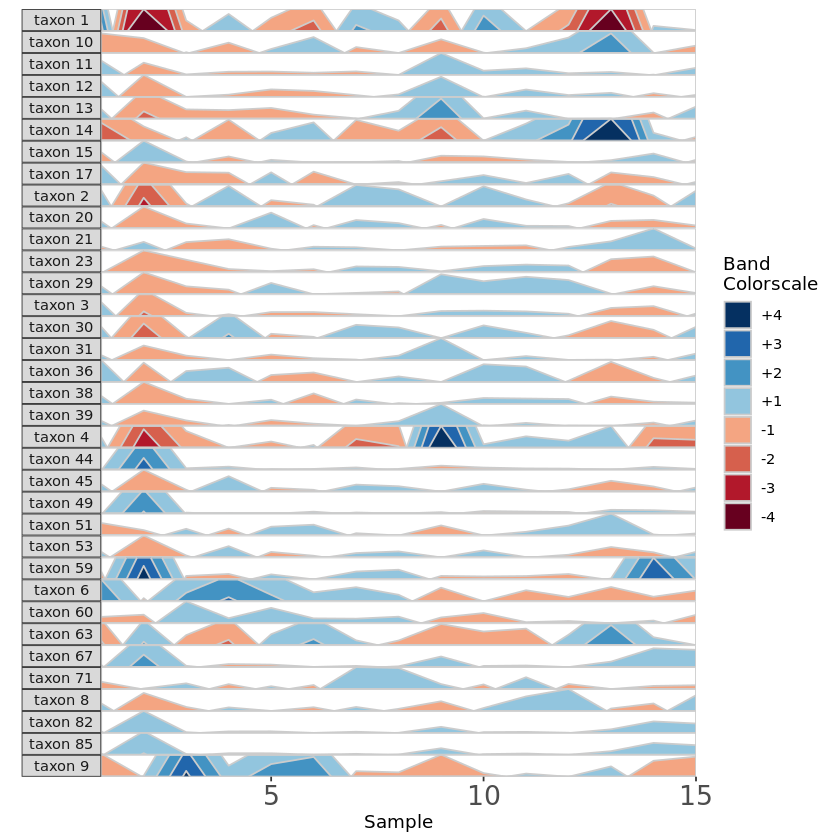

In [17]:
## 固定带厚度为2%。
paramList <- prepanel(
    otudata = otusample_diet,
    metadata = metadatasample_diet,
    subj = "MCTs01",
    band.thickness = 2
)

horizonplot(paramList)


Constructed an OTU table and other variables with the following settings:
thresh_prevalence: 80
thresh_abundance: 0.5
thresh_NA: 5
subj: MCTs01

35 OTUs met the filtering requirements, with the following stats:
     OTU_ID Average_abundance Prevalence Num_missing_samples
1   taxon 1        23.4808510        100                   0
2   taxon 2         7.0220155        100                   0
3   taxon 3         3.6456202        100                   0
4   taxon 4         5.6399479        100                   0
5   taxon 6         3.4120092        100                   0
6   taxon 8         1.7292719        100                   0
7   taxon 9         2.9895162        100                   0
8  taxon 10         1.9505486        100                   0
9  taxon 11         1.3130744        100                   0
10 taxon 12         0.8252183        100                   0
11 taxon 13         2.8683227        100                   0
12 taxon 14         4.4062186        100                 

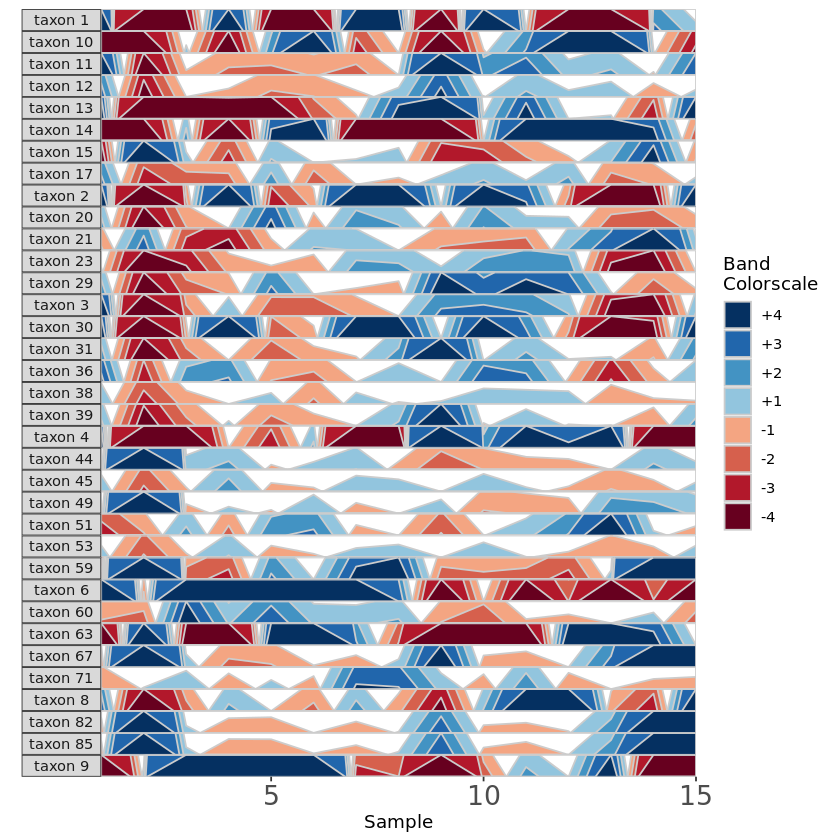

In [18]:
## 固定带厚度为0.2%。
paramList <- prepanel(
    otudata = otusample_diet,
    metadata = metadatasample_diet,
    subj = "MCTs01",
    band.thickness = 0.2
)

horizonplot(paramList)


请注意，在band.thick的较小数值下，越来越多的数值高于新的最大值或低于新的最小值，导致更多的极端带（在+4或-4）。这突出了低丰度的微生物的变化，但压缩了丰度较大的微生物的变化，使小的增加与大的增加变得模糊不清。

Constructed an OTU table and other variables with the following settings:
thresh_prevalence: 80
thresh_abundance: 0.5
thresh_NA: 5
subj: MCTs01

35 OTUs met the filtering requirements, with the following stats:
     OTU_ID Average_abundance Prevalence Num_missing_samples
1   taxon 1        23.4808510        100                   0
2   taxon 2         7.0220155        100                   0
3   taxon 3         3.6456202        100                   0
4   taxon 4         5.6399479        100                   0
5   taxon 6         3.4120092        100                   0
6   taxon 8         1.7292719        100                   0
7   taxon 9         2.9895162        100                   0
8  taxon 10         1.9505486        100                   0
9  taxon 11         1.3130744        100                   0
10 taxon 12         0.8252183        100                   0
11 taxon 13         2.8683227        100                   0
12 taxon 14         4.4062186        100                 

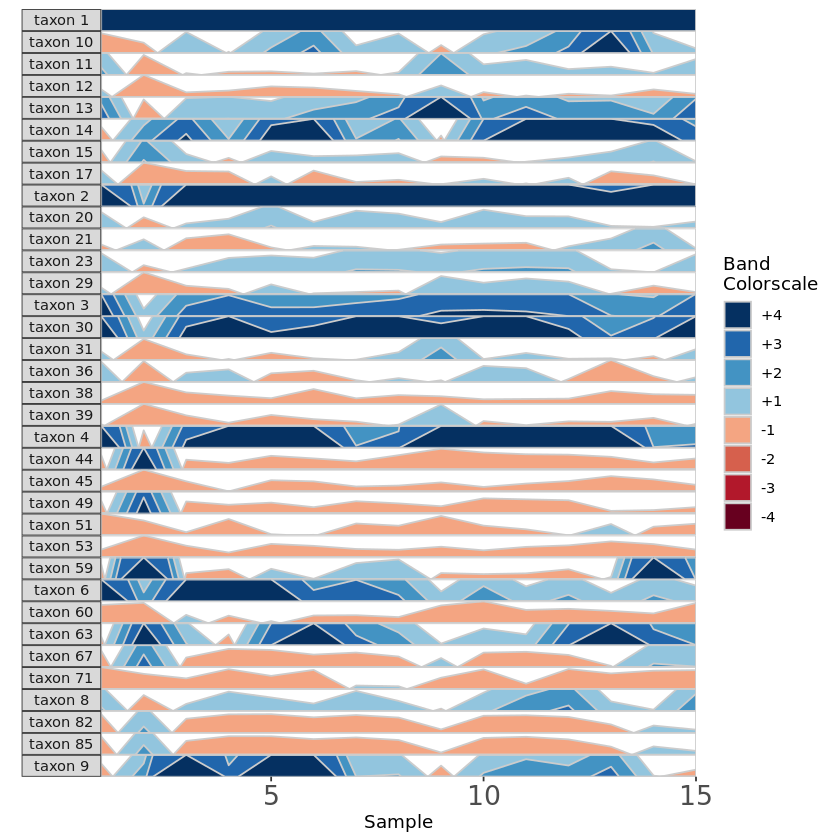

In [19]:
## 固定的原点和固定的条带厚度
paramList <- prepanel(
    otudata = otusample_diet,
    metadata = metadatasample_diet,
    subj = "MCTs01",
    origin = 1,
    band.thickness = 1
)
horizonplot(paramList)


设定一个固定的原点和条带厚度可以让我们比较不同面的数值。例如，在几乎所有的样本中，分类群2比分类群17更丰富。对于原点不固定的图，我们不能这么说，因为数值的中心不在同一个零点上。同样，一个可变的带状厚度意味着一个正值与原点的距离在各子图之间是不一致的。

# 处理缺失和/或不规则间隔的数据

缺失的数据点在微生物组数据集中很常见。为了处理偶尔出现的缺失数据点，该软件包提供了将数据转化为有规律的时间序列的工具。要做到这一点，我们要指定一个时间间隔来插值新数据。因为饮食研究是在17天内每天进行的，所以我们指定的时间间隔为1天。作为一个例子，我们使用受试者MCTs16，他在14/17天被取样。

In [20]:
## 将数据调整为1天的常规时间间隔
paramList <- prepanel(
    otudata = otusample_diet,
    metadata = metadatasample_diet,
    subj = "MCTs16",
    regularInterval = 1
)


Constructed an OTU table and other variables with the following settings:
thresh_prevalence: 80
thresh_abundance: 0.5
thresh_NA: 5
subj: MCTs16

35 OTUs met the filtering requirements, with the following stats:
      OTU_ID Average_abundance Prevalence Num_missing_samples
1    taxon 1        21.6531695        100                   0
2    taxon 2         5.7663661        100                   0
3    taxon 3         2.7768033        100                   0
4    taxon 6         7.1301719        100                   0
5    taxon 7         1.3132796        100                   0
6    taxon 8         1.3193278        100                   0
7    taxon 9         1.3124431        100                   0
8   taxon 10         1.4480669        100                   0
9   taxon 12         3.8644589        100                   0
10  taxon 13         2.4550626        100                   0
11  taxon 14         1.6552625        100                   0
12  taxon 15         1.5013438        100    

我们可以通过查看prepanel的输出列表中的时间戳变量，看到从第1天开始的样本采集日。这是列表中的第三个元素（你可以在horizonplot函数文档中查看列表的组成部分）。

In [21]:
paramList[[3]]

[1]  1  3  4  5  6  8  9 10 11 12 14 15 16 17

每个新的数值都将从之前和之后的时间点线性内插。然后，我们可以将插值点与观察到的数据点绘制在一起。

Constructed a horizon plot with the following settings:
regularInterval: 1
nbands: 4
facetLabelsByTaxonomy: FALSE
formatStep: FALSE
fill_NA: zoo::na.approx(y)
OTU table `biomehorizonpkg_refined_otu` was outputted to the environment.


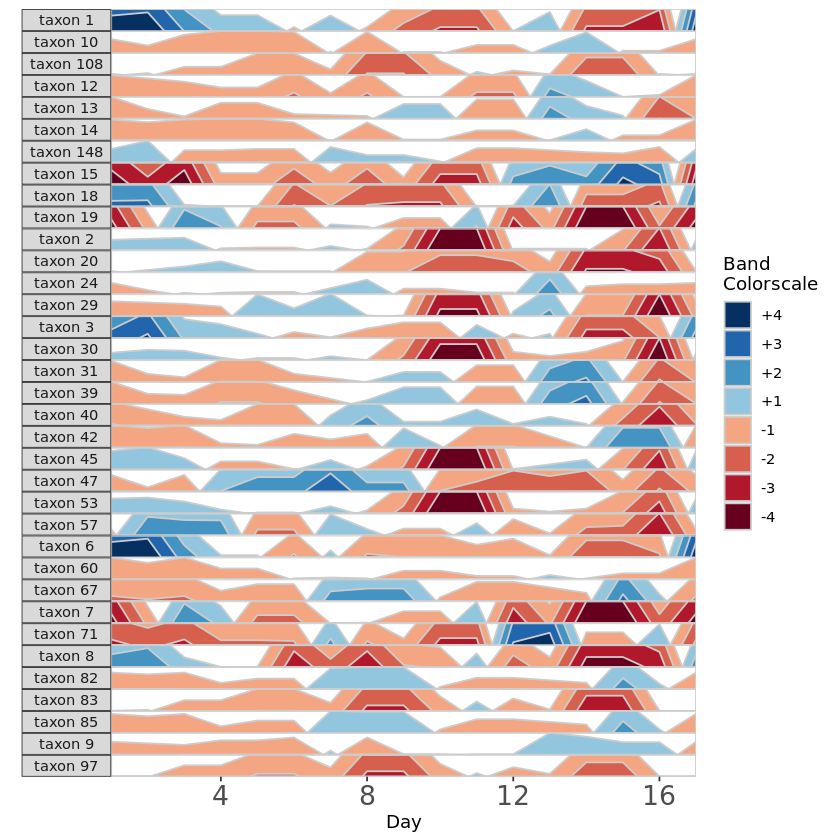

In [22]:
horizonplot(paramList)

请注意，由于数据已经被内插到定期间隔，X轴的标签已经变成了 "日 "而不是 "样本"。

内插法可能不适合于收集日之间有较大间隔的数据集。对于不规则间隔的微生物组数据，如在野生动物微生物组研究中作为观察性取样的一部分收集的数据，或在一年中的某些时间段内收集的数据（如夏季野外季节），通过大时间跨度的内插，正则化会引入不准确性。此外，在不考虑采样的时间差异的情况下绘制数据，有可能产生误导性的图表。例如，受试者Baboon_388在3年半（1316天）的时间里收集了59个样本。

Constructed an OTU table and other variables with the following settings:
thresh_prevalence: 80
thresh_abundance: 0.5
thresh_NA: 5
subj: Baboon_388

24 OTUs met the filtering requirements, with the following stats:
      OTU_ID Average_abundance Prevalence Num_missing_samples
1  asv_10260         0.5318285   93.22034                   0
2   asv_1543        17.4907374  100.00000                   0
3   asv_1874         2.7728697  100.00000                   0
4    asv_226         1.5098623   89.83051                   0
5   asv_2748         0.5031660   94.91525                   0
6   asv_2770         0.8789706   86.44068                   0
7   asv_2919         1.3148715   98.30508                   0
8   asv_2952         0.5449692   96.61017                   0
9   asv_3018         1.7929497   98.30508                   0
10  asv_3053         1.4678783   88.13559                   0
11  asv_3092         0.9178107   96.61017                   0
12  asv_3109         2.5931609   96.61017

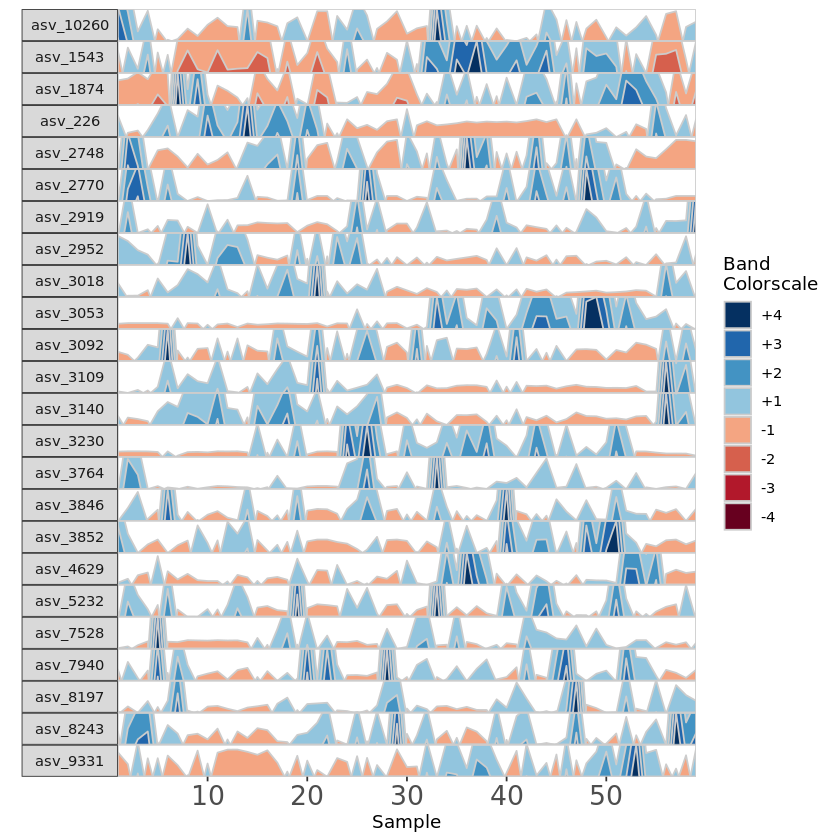

In [23]:
## 来自受试者Baboon_388的图示例
paramList <- prepanel(
    otudata = otusample_baboon,
    metadata = metadatasample_baboon,
    subj = "Baboon_388"
)

horizonplot(paramList)


因为otusample_baboon的间隔不规则，也就是说，在整个时间序列中，样本之间的时间距离并不一致，所以即使我们通过点与点之间的内插来规范数据，图上的时间尺度也会产生误导。我们可以通过指定允许的没有样本的最大时间量（即间隙）来创建一个内插的时间点，从而减少这种不准确的情况。例如，如果我们每50天内插一个点，但将样本之间的最大间隙设置为100天，那么相隔>100天的两个样本将不会有一个内插的时间点。相反，它将在时间轴上产生一个断点，数据将在断点的两边分别被规范化。这种断裂是通过把图分成两个面来模拟的。

Constructed an OTU table and other variables with the following settings:
thresh_prevalence: 80
thresh_abundance: 0.5
thresh_NA: 5
subj: Baboon_388

24 OTUs met the filtering requirements, with the following stats:
      OTU_ID Average_abundance Prevalence Num_missing_samples
1  asv_10260         0.5318285   93.22034                   0
2   asv_1543        17.4907374  100.00000                   0
3   asv_1874         2.7728697  100.00000                   0
4    asv_226         1.5098623   89.83051                   0
5   asv_2748         0.5031660   94.91525                   0
6   asv_2770         0.8789706   86.44068                   0
7   asv_2919         1.3148715   98.30508                   0
8   asv_2952         0.5449692   96.61017                   0
9   asv_3018         1.7929497   98.30508                   0
10  asv_3053         1.4678783   88.13559                   0
11  asv_3092         0.9178107   96.61017                   0
12  asv_3109         2.5931609   96.61017

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.



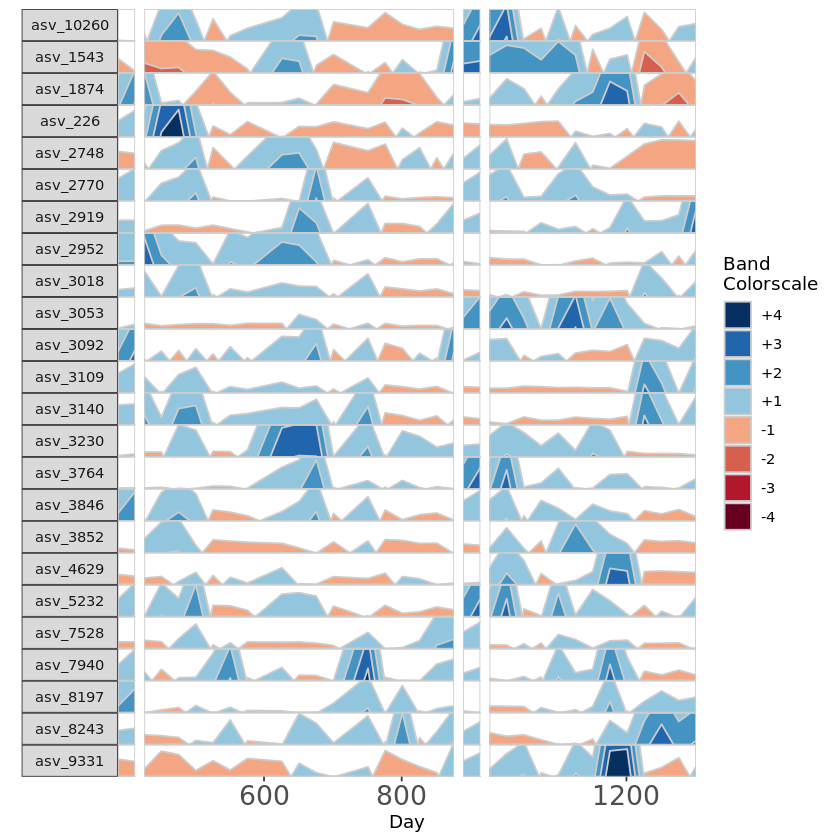

In [24]:
## 设置最大间隔为75
paramList <- prepanel(
    otudata = otusample_baboon,
    metadata = metadatasample_baboon,
    subj = "Baboon_388",
    regularInterval = 25,
    maxGap = 75
)

## 添加自定义的轴刻度集，以避免标签重叠
horizonplot(paramList) +
    ggplot2::scale_x_continuous(
        expand = c(0, 0),
        breaks = seq(from = 0, by = 200, to = 1200)
    )


我们可以看到从第1天开始的样本采集日。

In [25]:
paramList[[3]]

[1]    1  157  162  172  183  313  415  424  427  430  432  436  443  455  477
[16]  479  485  492  508  511  514  519  569  635  655  691  697  760  773  821
[31]  847  877  988 1047 1068 1071 1071 1074 1076 1087 1093 1096 1096 1099 1102
[46] 1107 1118 1121 1121 1136 1150 1157 1178 1202 1214 1219 1235 1274 1316

Constructed a horizon plot with the following settings:
regularInterval: 25
maxGap: 75
nbands: 4
facetLabelsByTaxonomy: FALSE
formatStep: FALSE
fill_NA: zoo::na.approx(y)
OTU table `biomehorizonpkg_refined_otu` was outputted to the environment.


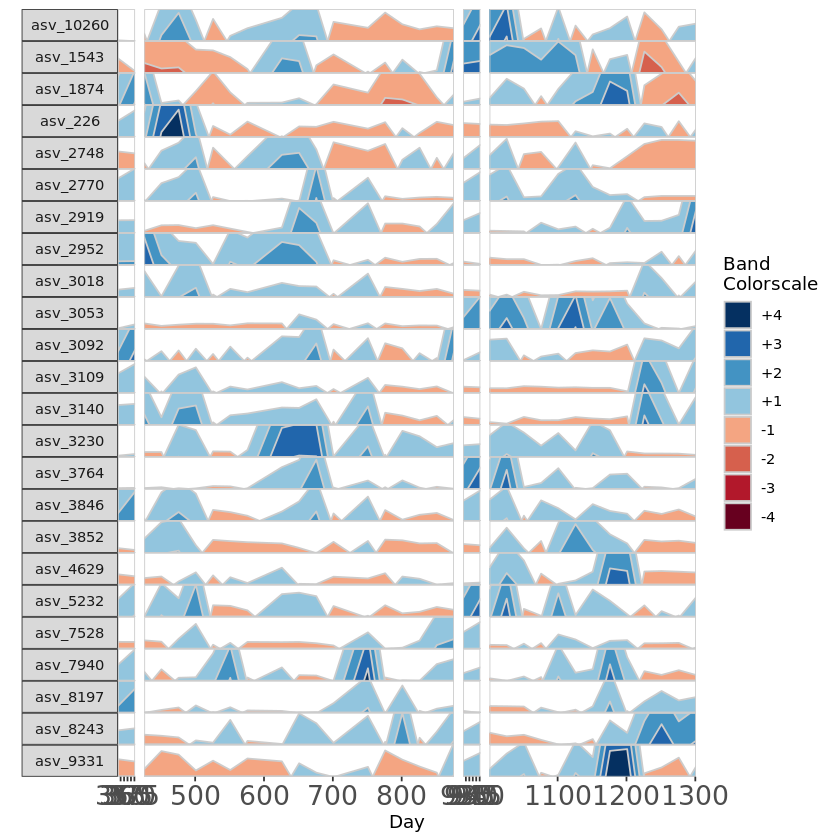

In [26]:
horizonplot(paramList)

如果在时间轴上创建了许多断点，这可能会导致面的样本数量非常少。例如，如果maxGap=150，而前两个样本在第1天和第157天，那么第一个切面将只包含一个样本（第1天）。你可以设置包含一个切面所需的最小样本数。当断裂的结果是面的数量少于指定的最小数量时，这些面就不会被显示。默认=2个样本，所以这个图不会从第1天开始。

Constructed an OTU table and other variables with the following settings:
thresh_prevalence: 80
thresh_abundance: 0.5
thresh_NA: 5
subj: Baboon_388

24 OTUs met the filtering requirements, with the following stats:
      OTU_ID Average_abundance Prevalence Num_missing_samples
1  asv_10260         0.5318285   93.22034                   0
2   asv_1543        17.4907374  100.00000                   0
3   asv_1874         2.7728697  100.00000                   0
4    asv_226         1.5098623   89.83051                   0
5   asv_2748         0.5031660   94.91525                   0
6   asv_2770         0.8789706   86.44068                   0
7   asv_2919         1.3148715   98.30508                   0
8   asv_2952         0.5449692   96.61017                   0
9   asv_3018         1.7929497   98.30508                   0
10  asv_3053         1.4678783   88.13559                   0
11  asv_3092         0.9178107   96.61017                   0
12  asv_3109         2.5931609   96.61017

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.



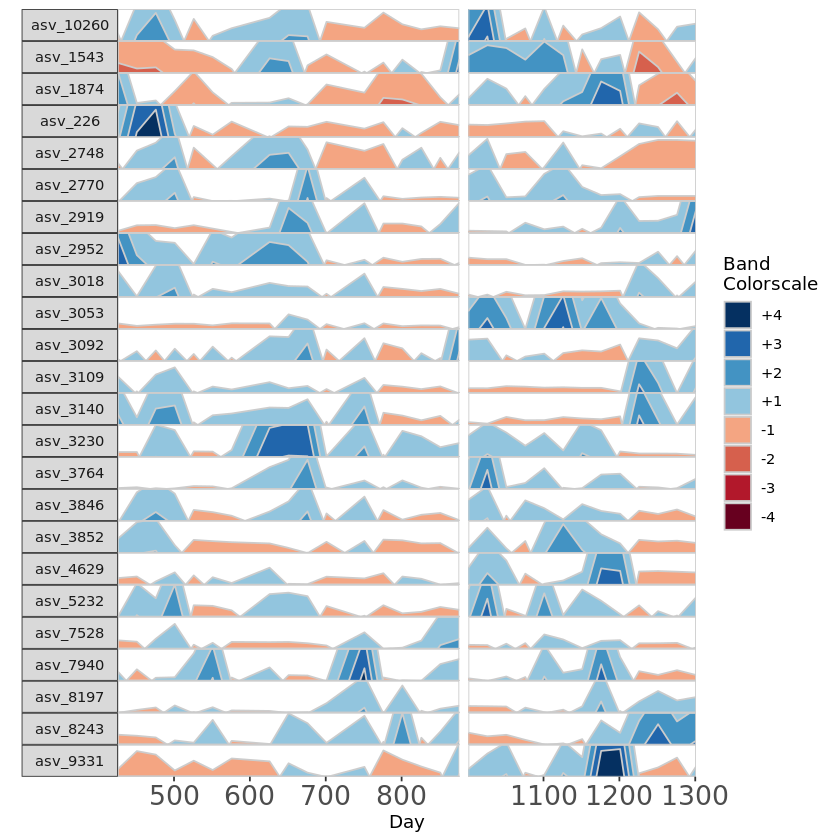

In [27]:
## 移除少于5个样本的条带
paramList <- prepanel(
    otudata = otusample_baboon,
    metadata = metadatasample_baboon,
    subj = "Baboon_388",
    regularInterval = 25,
    maxGap = 75,
    minSamplesPerFacet = 5
)

horizonplot(paramList) +
    ggplot2::scale_x_continuous(
        expand = c(0, 0),
        breaks = seq(
            from = 0,
            by = 100,
            to = 1300
        )
    )


# 自定义图表美术

除了默认的每个微生物子图的OTU ID标签外，我们还可以通过分类法来标记面。这种方法将显示每个微生物的最窄的分类级别作为面的标签。要做到这一点，我们需要提供带有分类学信息的第三个数据集，即taxonomysample。

Constructed an OTU table and other variables with the following settings:
thresh_prevalence: 80
thresh_abundance: 0.5
thresh_NA: 5
subj: MCTs01

35 OTUs met the filtering requirements, with the following stats:
     OTU_ID Average_abundance Prevalence Num_missing_samples
1   taxon 1        23.4808510        100                   0
2   taxon 2         7.0220155        100                   0
3   taxon 3         3.6456202        100                   0
4   taxon 4         5.6399479        100                   0
5   taxon 6         3.4120092        100                   0
6   taxon 8         1.7292719        100                   0
7   taxon 9         2.9895162        100                   0
8  taxon 10         1.9505486        100                   0
9  taxon 11         1.3130744        100                   0
10 taxon 12         0.8252183        100                   0
11 taxon 13         2.8683227        100                   0
12 taxon 14         4.4062186        100                 

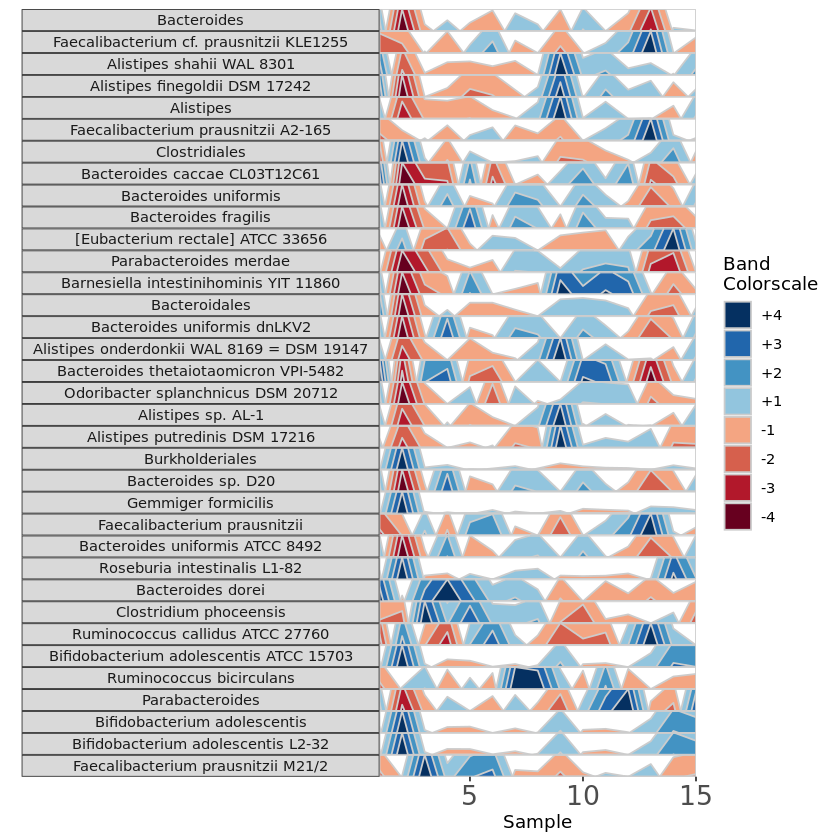

In [28]:
## 提供taxonomysample并将facetLabelsByTaxonomy设置为TRUE。
paramList <- prepanel(
    otudata = otusample_diet,
    metadata = metadatasample_diet,
    taxonomydata = taxonomysample_diet$taxonomy,
    subj = "MCTs01",
    facetLabelsByTaxonomy = TRUE
)

horizonplot(paramList)


另外，我们也可以提供自定义的面的标签。这些标签将按照向量指定的顺序，从上到下应用于面的子图。

Constructed an OTU table and other variables with the following settings:
thresh_prevalence: 80
thresh_abundance: 0.5
thresh_NA: 5
subj: MCTs01
Constructed a horizon plot with the following settings:
nbands: 4
facetLabelsByTaxonomy: FALSE
formatStep: FALSE
fill_NA: zoo::na.approx(y)
OTU table `biomehorizonpkg_refined_otu` was outputted to the environment.
Taxonomy data table `biomehorizonpkg_taxonomy` was outputted to the environment.


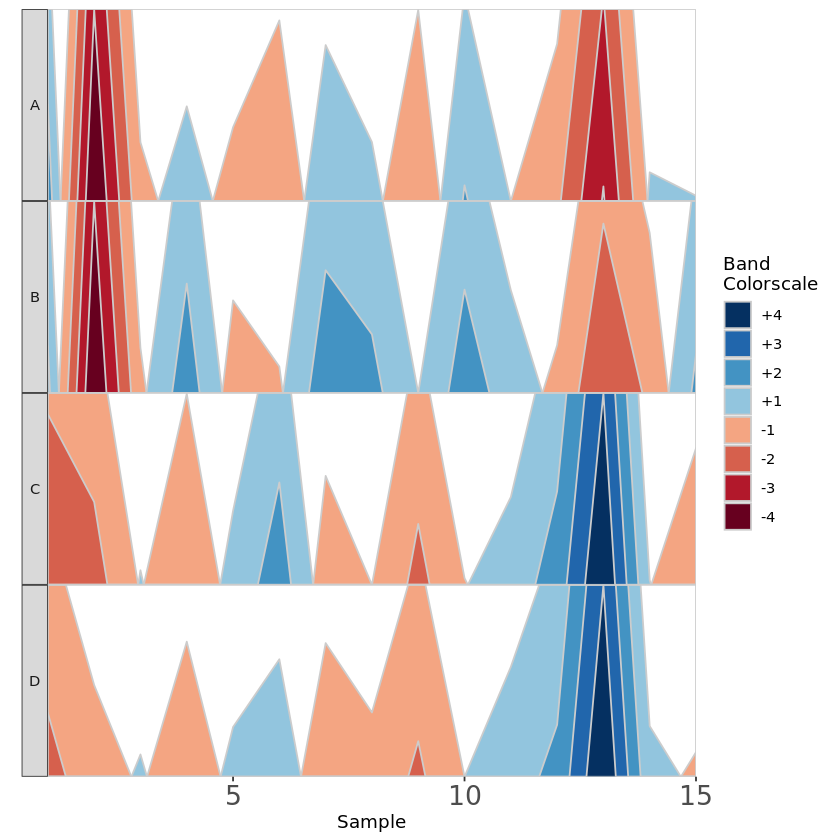

In [29]:
## 应用自定义的按字母顺序排列的面版标签
paramList <- prepanel(
    otudata = otusample_diet,
    metadata = metadatasample_diet,
    taxonomydata = taxonomysample_diet,
    subj = "MCTs01",
    otulist = c("taxon 1", "taxon 2", "taxon 10", "taxon 14"),
    customFacetLabels = LETTERS[1:4]
)

horizonplot(paramList)


我们可以通过给horizonplot()函数补充一个美学列表来进一步定制水平线图。我们通过调用horizonaes()函数来获得这个列表，并使用自定义美学来覆盖默认值。如果没有给horizonplot()指定自定义美学，那么将通过调用不带参数的horizonaes()来获取默认美学。

Constructed an OTU table and other variables with the following settings:
thresh_prevalence: 80
thresh_abundance: 0.5
thresh_NA: 5
subj: MCTs01

35 OTUs met the filtering requirements, with the following stats:
     OTU_ID Average_abundance Prevalence Num_missing_samples
1   taxon 1        23.4808510        100                   0
2   taxon 2         7.0220155        100                   0
3   taxon 3         3.6456202        100                   0
4   taxon 4         5.6399479        100                   0
5   taxon 6         3.4120092        100                   0
6   taxon 8         1.7292719        100                   0
7   taxon 9         2.9895162        100                   0
8  taxon 10         1.9505486        100                   0
9  taxon 11         1.3130744        100                   0
10 taxon 12         0.8252183        100                   0
11 taxon 13         2.8683227        100                   0
12 taxon 14         4.4062186        100                 

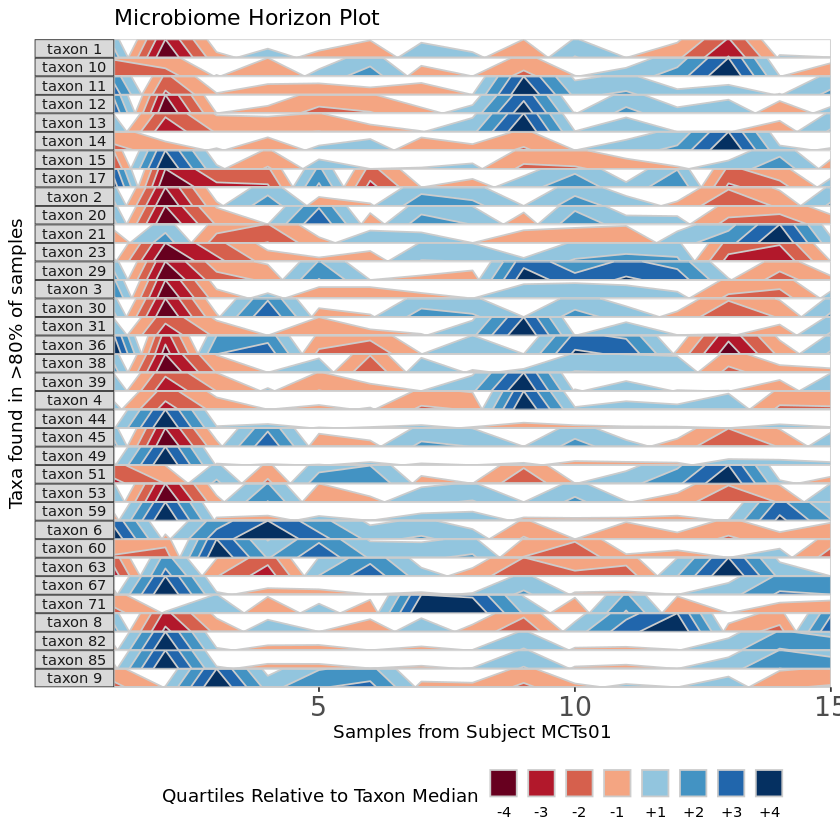

In [37]:
paramList <- prepanel(
    otudata = otusample_diet,
    metadata = metadatasample_diet,
    taxonomydata = taxonomysample_diet,
    subj = "MCTs01"
)

## 添加标题；覆盖x-label、y-label和图例标题默认值；调整图例位置
horizonplot(paramList,
    aesthetics = horizonaes(
        title = "Microbiome Horizon Plot",
        xlabel = "Samples from Subject MCTs01",
        ylabel = "Taxa found in >80% of samples",
        legendTitle = "Quartiles Relative to Taxon Median",
        legendPosition = "bottom"
    )
)


Constructed a horizon plot with the following settings:
nbands: 4
facetLabelsByTaxonomy: FALSE
formatStep: FALSE
fill_NA: zoo::na.approx(y)
OTU table `biomehorizonpkg_refined_otu` was outputted to the environment.
Taxonomy data table `biomehorizonpkg_taxonomy` was outputted to the environment.


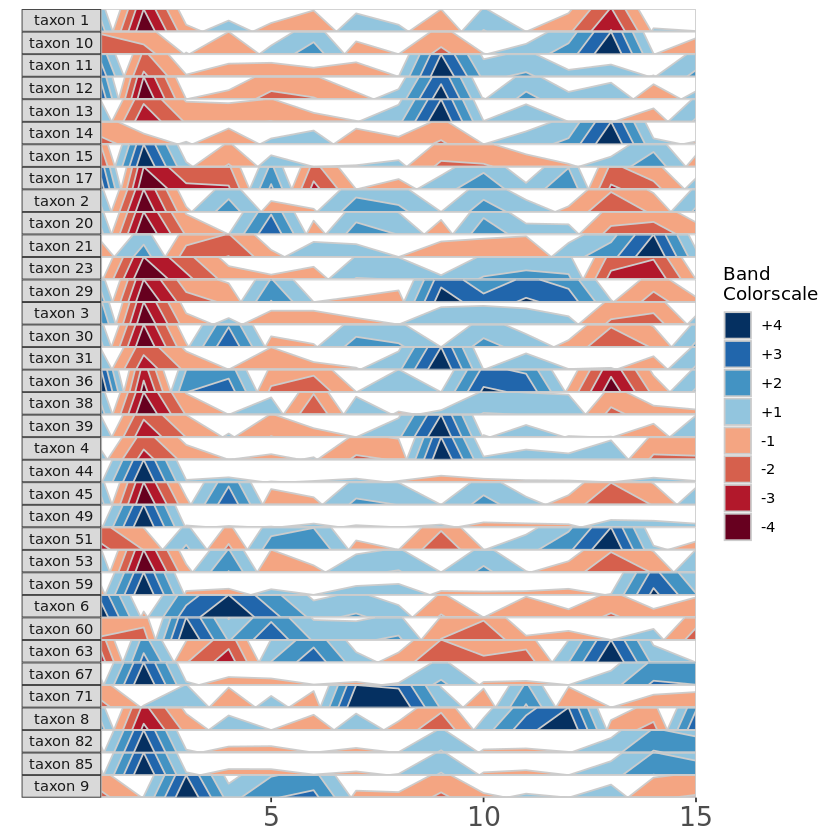

In [31]:
## 删除一个默认的美术设计
horizonplot(paramList,
    aesthetics = horizonaes(xlabel = NULL)
)


我们可以为地平线色带提供一个新的色标，作为一个十六进制颜色代码的向量，从最负的色带到最正的色带排序。矢量的长度等于2 * prepanel中指定的正色带的数量。

In [32]:
## 有多少个正向条带？
paramList[[14]]

[1] 4

Constructed a horizon plot with the following settings:
nbands: 4
facetLabelsByTaxonomy: FALSE
formatStep: FALSE
fill_NA: zoo::na.approx(y)
OTU table `biomehorizonpkg_refined_otu` was outputted to the environment.
Taxonomy data table `biomehorizonpkg_taxonomy` was outputted to the environment.


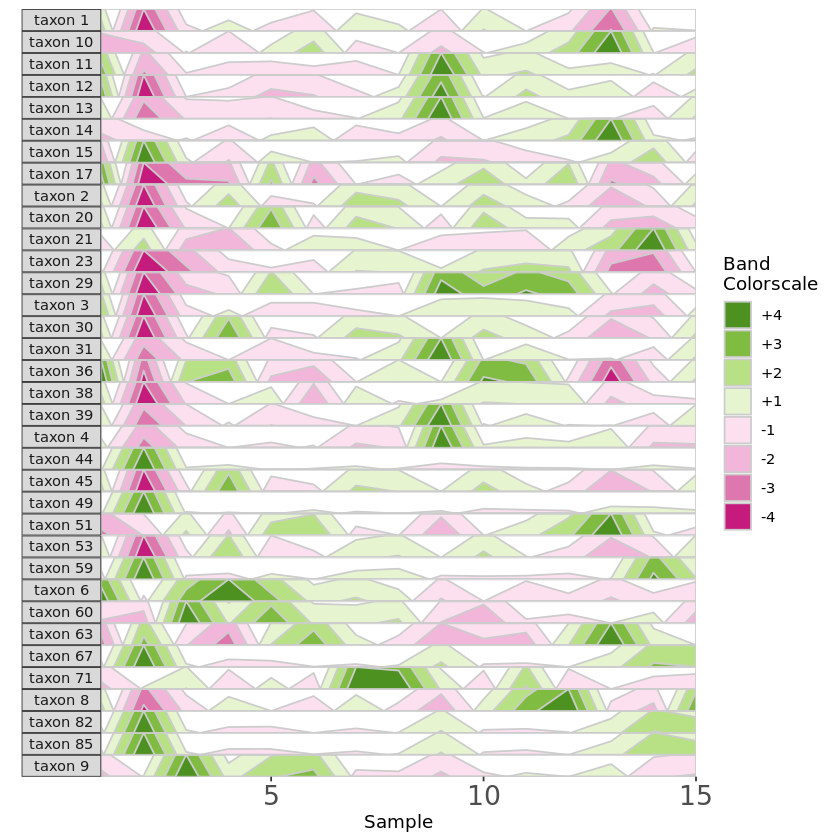

In [33]:
## 提供长度为8的定制色标
library(RColorBrewer)
horizonplot(paramList,
    aesthetics = horizonaes(col.bands = brewer.pal(8, "PiYG"))
)


最常见的相关美学是由horizonaes()返回的，但如果我们想添加这个函数中没有包括的其他美学，我们可以使用ggplot手动将它们附加到地平线绘图对象上。例如，我们可以在X轴上标注日期。

Constructed an OTU table and other variables with the following settings:
thresh_prevalence: 80
thresh_abundance: 0.5
thresh_NA: 5
subj: Baboon_388

24 OTUs met the filtering requirements, with the following stats:
      OTU_ID Average_abundance Prevalence Num_missing_samples
1  asv_10260         0.5318285   93.22034                   0
2   asv_1543        17.4907374  100.00000                   0
3   asv_1874         2.7728697  100.00000                   0
4    asv_226         1.5098623   89.83051                   0
5   asv_2748         0.5031660   94.91525                   0
6   asv_2770         0.8789706   86.44068                   0
7   asv_2919         1.3148715   98.30508                   0
8   asv_2952         0.5449692   96.61017                   0
9   asv_3018         1.7929497   98.30508                   0
10  asv_3053         1.4678783   88.13559                   0
11  asv_3092         0.9178107   96.61017                   0
12  asv_3109         2.5931609   96.61017

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.



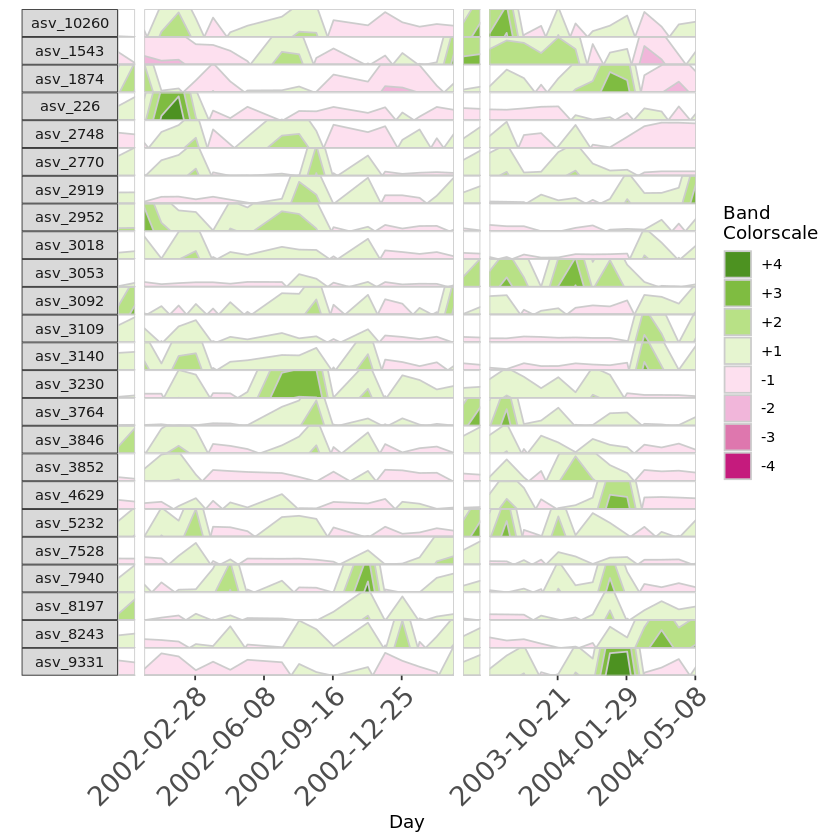

In [34]:
## 按日期标记X轴

paramList <- prepanel(
    otudata = otusample_baboon,
    metadata = metadatasample_baboon,
    subj = "Baboon_388",
    regularInterval = 25,
    maxGap = 75
)

dateVec <- as.Date(c(500, 600, 700, 800, 1100, 1200, 1300),
    origin = min(subset(metadatasample_baboon, 
    subject =="Baboon_388")$collection_date) - 1
)

horizonplot(paramList, aesthetics = horizonaes(col.bands = brewer.pal(8, "PiYG"))) +
    ggplot2::scale_x_continuous(
        expand = c(0, 0),
        breaks = c(500, 600, 700, 800, 1100, 1200, 1300),
        labels = dateVec
    ) +
    ggplot2::theme(axis.text.x = ggplot2::element_text(angle = 45, hjust = 1))


# 复现论文中的图示

下面的代码可以用来重现论文中的所有图表。

In [35]:
library(biomehorizon)
library(dplyr)
library(cowplot)

#### 图1A的地平线图部分 ####

## 对所有17天都被抽样的受试者的数据集进行子集，并按日期排列。
metadata_17 <- metadatasample_diet %>%
  filter(subject %in%
    c("MCTs08", "MCTs18", "MCTs23", "MCTs26", "MCTs33", "MCTs36")) %>%
  arrange(subject, collection_date)

otu_17 <- otusample_diet %>%
  select(taxon_id, as.character((metadatasample_diet %>%
    filter(subject %in%
      c("MCTs08", "MCTs18", "MCTs23", "MCTs26", "MCTs33", "MCTs36")))$sample))

## 用 "Taxon1 "进行单变量分析
paramList <- prepanel(
  otudata = otu_17,
  metadata = metadata_17,
  singleVarOTU = "taxon 1"
)

png("plot_by_subject.png",
  width = 200,
  height = 125,
  units = "mm",
  res = 300
)

horizonplot(paramList)

dev.off()

#### Fig 1B ####

paramList <- prepanel(
  otudata = otusample_diet,
  metadata = metadatasample_diet,
  taxonomydata = taxonomysample_diet$taxonomy,
  subj = "MCTs01",
  facetLabelsByTaxonomy = TRUE,
  thresh_abundance = 0.75
)

png("plot_taxonomy_labels.png",
  width = 200,
  height = 150,
  units = "mm",
  res = 300
)

horizonplot(paramList)

dev.off()

#### Fig 1C ####

paramList <- prepanel(
  otudata = otusample_diet,
  metadata = metadatasample_diet,
  taxonomydata = taxonomysample_diet$taxonomy,
  subj = "MCTs01",
  facetLabelsByTaxonomy = TRUE,
  origin = 1,
  band.thickness = 10,
  thresh_abundance = 0.75
)

png("plot_origin1_bandthick10.png",
  width = 200,
  height = 150,
  units = "mm",
  res = 300
)

horizonplot(paramList)

dev.off()

#### Fig 1D ####

library(RColorBrewer)
paramList <- prepanel(
  otudata = otusample_baboon,
  metadata = metadatasample_baboon,
  subj = "Baboon_388",
  regularInterval = 25,
  maxGap = 75
)

dateVec <- as.Date(c(500, 600, 700, 800, 1100, 1200, 1300),
  origin = min(subset(metadatasample_baboon, subject == "Baboon_388")$collection_date) - 1
)

png("plot_customaes.png",
  width = 400,
  height = 150,
  units = "mm",
  res = 300
)

horizonplot(paramList,
  aesthetics = horizonaes(
    col.bands = brewer.pal(8, "PiYG"),
    title = "Microbiome Horizon Plot for Subject Baboon_388",
    xlabel = "Collection date",
    ylabel = "Taxa found in >80% of samples",
    legendTitle = "Quartiles Relative to Taxon Median",
    legendPosition = "bottom"
  )
) +
  ggplot2::scale_x_continuous(
    expand = c(0, 0),
    breaks = c(500, 600, 700, 800, 1100, 1200, 1300),
    labels = dateVec
  ) +
  ggplot2::theme(axis.text.x = ggplot2::element_text(angle = 45, hjust = 1))

dev.off()


Constructed an OTU table and other variables with the following settings:
thresh_prevalence: 80
thresh_abundance: 0.5
thresh_NA: 5
singleVarOTU: taxon 1
Constructed a horizon plot with the following settings:
nbands: 4
facetLabelsByTaxonomy: FALSE
formatStep: FALSE
fill_NA: zoo::na.approx(y)
OTU table `biomehorizonpkg_refined_otu` was outputted to the environment.


png 
  2

Constructed an OTU table and other variables with the following settings:
thresh_prevalence: 80
thresh_abundance: 0.75
thresh_NA: 5
subj: MCTs01

27 OTUs met the filtering requirements, with the following stats:
     OTU_ID Average_abundance Prevalence Num_missing_samples
1   taxon 1        23.4808510        100                   0
2   taxon 2         7.0220155        100                   0
3   taxon 3         3.6456202        100                   0
4   taxon 4         5.6399479        100                   0
5   taxon 6         3.4120092        100                   0
6   taxon 8         1.7292719        100                   0
7   taxon 9         2.9895162        100                   0
8  taxon 10         1.9505486        100                   0
9  taxon 11         1.3130744        100                   0
10 taxon 12         0.8252183        100                   0
11 taxon 13         2.8683227        100                   0
12 taxon 14         4.4062186        100                

png 
  2

Constructed an OTU table and other variables with the following settings:
thresh_prevalence: 80
thresh_abundance: 0.75
thresh_NA: 5
subj: MCTs01

27 OTUs met the filtering requirements, with the following stats:
     OTU_ID Average_abundance Prevalence Num_missing_samples
1   taxon 1        23.4808510        100                   0
2   taxon 2         7.0220155        100                   0
3   taxon 3         3.6456202        100                   0
4   taxon 4         5.6399479        100                   0
5   taxon 6         3.4120092        100                   0
6   taxon 8         1.7292719        100                   0
7   taxon 9         2.9895162        100                   0
8  taxon 10         1.9505486        100                   0
9  taxon 11         1.3130744        100                   0
10 taxon 12         0.8252183        100                   0
11 taxon 13         2.8683227        100                   0
12 taxon 14         4.4062186        100                

png 
  2

Constructed an OTU table and other variables with the following settings:
thresh_prevalence: 80
thresh_abundance: 0.5
thresh_NA: 5
subj: Baboon_388

24 OTUs met the filtering requirements, with the following stats:
      OTU_ID Average_abundance Prevalence Num_missing_samples
1  asv_10260         0.5318285   93.22034                   0
2   asv_1543        17.4907374  100.00000                   0
3   asv_1874         2.7728697  100.00000                   0
4    asv_226         1.5098623   89.83051                   0
5   asv_2748         0.5031660   94.91525                   0
6   asv_2770         0.8789706   86.44068                   0
7   asv_2919         1.3148715   98.30508                   0
8   asv_2952         0.5449692   96.61017                   0
9   asv_3018         1.7929497   98.30508                   0
10  asv_3053         1.4678783   88.13559                   0
11  asv_3092         0.9178107   96.61017                   0
12  asv_3109         2.5931609   96.61017

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

